## Cardiovascular risk prediction using machine learning algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#### Loading the data 

In [2]:

data=pd.read_csv('heart_1.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


####  Exploratory Data Analysis:
 The main goal of EDA is to  get an understanding for which variables are important, visualize the data, and view summary statistics


[Text(0, 0, 'Normal'), Text(1, 0, 'Heart Disease')]

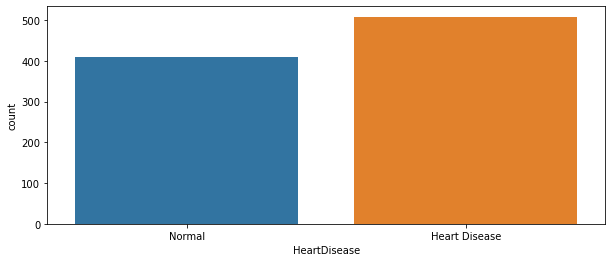

In [5]:
plt.figure(figsize=(10,4))
g=sns.countplot(x='HeartDisease',data=data)
g.set_xticklabels(['Normal','Heart Disease'])

<AxesSubplot:>

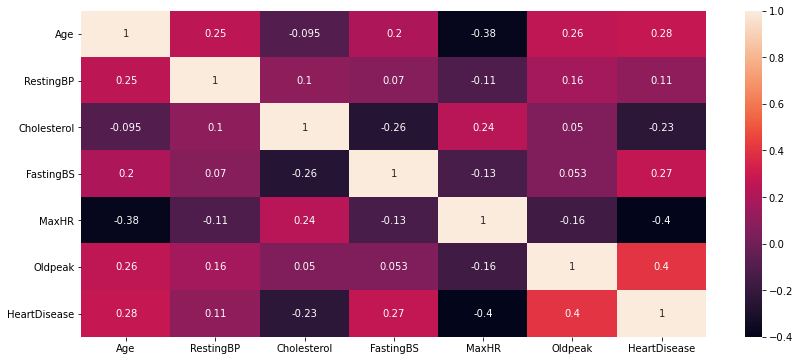

In [6]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True)

In [7]:
data.corr()['HeartDisease'].sort_values()

MaxHR          -0.400421
Cholesterol    -0.232741
RestingBP       0.107589
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

<AxesSubplot:>

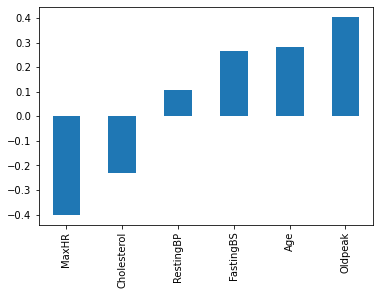

In [8]:
data.corr()['HeartDisease'].sort_values().drop('HeartDisease').plot(kind='bar')

<AxesSubplot:xlabel='Age', ylabel='count'>

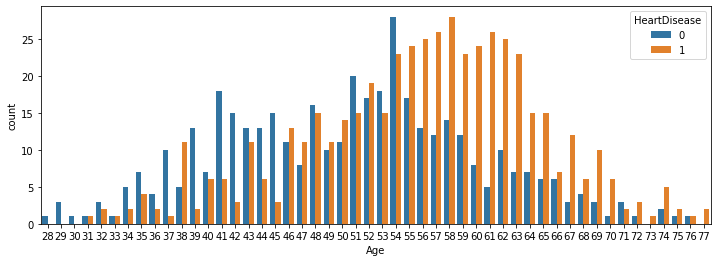

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(x='Age', data=data, hue='HeartDisease')


 We can see that the risk of heart disease is higher from age 50 to 65

<AxesSubplot:xlabel='Sex', ylabel='count'>

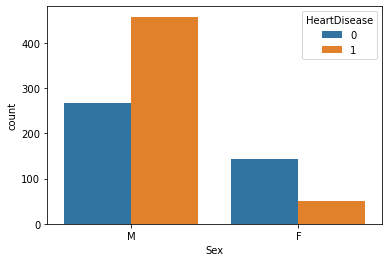

In [13]:
sns.countplot(x='Sex', data=data, hue='HeartDisease')


We can clearly see that risk of heart disease is higher among men than women


[Text(0, 0, 'Atypical Angina'),
 Text(1, 0, 'Non-Anginal Pain'),
 Text(2, 0, 'Asymptomatic'),
 Text(3, 0, 'Typical Angina')]

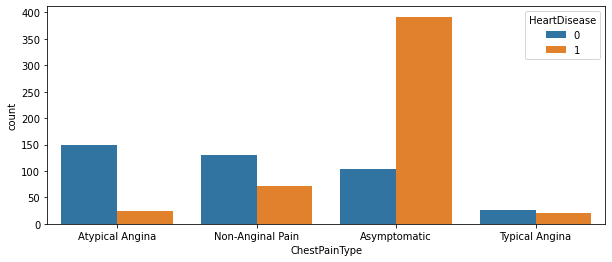

In [14]:
plt.figure(figsize=(10,4))
g=sns.countplot(x='ChestPainType', data=data, hue='HeartDisease')
g.set_xticklabels(['Atypical Angina','Non-Anginal Pain','Asymptomatic','Typical Angina'])


### DATA Preprocessing:
- The main objective is to remove or fill any missing data, remove unnecessary or repetitive features and convert categorical  features to dummy variables.

In [15]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is no missing data in this data set

#### Categorical Variables and Dummy Variables: 
- Listing all the columns that are currently non-numeric

In [16]:
data.select_dtypes(['object']).columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [17]:
dummies=pd.get_dummies(data[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']],drop_first=True)
dummies

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1,1,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,1,0
2,1,1,0,0,0,1,0,0,1
3,0,0,0,0,1,0,1,1,0
4,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,1,0,0,1,0
914,1,0,0,0,1,0,0,1,0
915,1,0,0,0,1,0,1,1,0
916,0,1,0,0,0,0,0,1,0


In [18]:
df_d=data.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)
df=pd.concat([df_d,dummies],axis=1)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


### Train Test Split
- Splitting The data into training data(70%) and testing data(30%)

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X=df.drop(['HeartDisease'], axis=1)
y=df['HeartDisease']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)

In [25]:
X_test=scaler.transform(X_test)

### 1.1  Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier(max_depth=12)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12)

### 1.2 Predictions and Evaluations

In [28]:
predictions_dtree = dtree.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [30]:
score=accuracy_score(y_test,predictions_dtree)
print("Test Accuracy Score : ",score*100,'\n\n')

dtScore=cross_val_score(dtree,X,y,cv=10).mean()*100
print("10-Fold CV Score : ",dtScore,'\n')

print("Confusion Matrix : \n",confusion_matrix(y_test,predictions_dtree),'\n\n')
dt_cr=classification_report(y_test,predictions_dtree)
print(dt_cr)

Test Accuracy Score :  80.248833592535 


10-Fold CV Score :  77.7627806975633 

Confusion Matrix : 
 [[226  50]
 [ 77 290]] 


              precision    recall  f1-score   support

           0       0.75      0.82      0.78       276
           1       0.85      0.79      0.82       367

    accuracy                           0.80       643
   macro avg       0.80      0.80      0.80       643
weighted avg       0.81      0.80      0.80       643



### 2.1 Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

#### 2.2 Predictions and Evaluations

In [32]:
rfc_pred = rfc.predict(X_test)

In [33]:
score=accuracy_score(y_test,rfc_pred)
print("Test Accuracy Score : ",score*100,'\n\n')

rfScore=cross_val_score(rfc,X,y,cv=10).mean()*100
print("10-Fold CV Score : ",rfScore,'\n')

print("Confusion Matrix : \n",confusion_matrix(y_test,rfc_pred),'\n\n')
rf_cr=classification_report(y_test,rfc_pred)
print(rf_cr)

Test Accuracy Score :  86.62519440124416 


10-Fold CV Score :  84.61896798853321 

Confusion Matrix : 
 [[243  33]
 [ 53 314]] 


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       276
           1       0.90      0.86      0.88       367

    accuracy                           0.87       643
   macro avg       0.86      0.87      0.86       643
weighted avg       0.87      0.87      0.87       643



In [34]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)


SVC()

### 3.2 Predictions and Evaluations

In [35]:
pred_svc=svc.predict(X_test)

In [36]:
score=accuracy_score(y_test,pred_svc)
print("Test Accuracy Score : ",score*100,'\n\n')

svcScore=cross_val_score(svc,X,y,cv=10).mean()*100
print("10-Fold CV Score : ",svcScore,'\n')

print("Confusion Matrix : \n",confusion_matrix(y_test,pred_svc),'\n\n')
svc_cr=classification_report(y_test,pred_svc)
print(svc_cr)

Test Accuracy Score :  87.09175738724728 


10-Fold CV Score :  70.78475871954133 

Confusion Matrix : 
 [[245  31]
 [ 52 315]] 


              precision    recall  f1-score   support

           0       0.82      0.89      0.86       276
           1       0.91      0.86      0.88       367

    accuracy                           0.87       643
   macro avg       0.87      0.87      0.87       643
weighted avg       0.87      0.87      0.87       643



#### Hyperparameter tuning: GridSearchCV
GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested

In [37]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 


In [38]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.509 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.509 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.509 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.509 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.527 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.836 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.909 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.855 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [39]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [40]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [41]:
grid_predictions=grid.predict(X_test)

In [42]:
score=accuracy_score(y_test,grid_predictions)
print("Test Accuracy Score : ",score*100,'\n\n')

gridScore=cross_val_score(svc,X,y,cv=10).mean()*100
print("10-Fold CV Score : ",gridScore,'\n')

print("Confusion Matrix : \n",confusion_matrix(y_test,grid_predictions),'\n\n')
grid_svc_cr=classification_report(y_test,grid_predictions)
print(grid_svc_cr)

Test Accuracy Score :  87.09175738724728 


10-Fold CV Score :  70.78475871954133 

Confusion Matrix : 
 [[248  28]
 [ 55 312]] 


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       276
           1       0.92      0.85      0.88       367

    accuracy                           0.87       643
   macro avg       0.87      0.87      0.87       643
weighted avg       0.88      0.87      0.87       643



#### Comparing models based on metric evaluation


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [44]:
#Accuracy Scores
dt_acc = accuracy_score(y_test,predictions_dtree)
rfc_acc = accuracy_score(y_test,rfc_pred)
svc_acc = accuracy_score(y_test,pred_svc)
gid_svc_acc = accuracy_score(y_test,grid_predictions)

In [45]:
dt_pre = precision_score(y_test,predictions_dtree)
rfc_pre = precision_score(y_test,rfc_pred)
svc_pre = precision_score(y_test,pred_svc)
grid_svc_pre = precision_score(y_test,grid_predictions)

In [46]:
dt_rcc = recall_score(y_test,predictions_dtree)
rfc_rcc = recall_score(y_test,rfc_pred)
svc_rcc = recall_score(y_test,pred_svc)
grid_svc_rcc = recall_score(y_test,grid_predictions)

In [47]:
dt_f1 = f1_score(y_test,predictions_dtree)
rfc_f1 = f1_score(y_test,rfc_pred)
svc_f1 = f1_score(y_test,pred_svc)
grid_svc_f1 = f1_score(y_test,grid_predictions)

In [48]:
Model = ['Decision Trees', 'Random Forest', 'SVC','SVC-gridcv']
Accuracy = [dt_acc, rfc_acc, svc_acc, gid_svc_acc]
Precision=[dt_pre,rfc_pre,svc_pre,grid_svc_pre]
Recall=[dt_rcc,rfc_rcc,svc_rcc,grid_svc_rcc]
F1Score=[dt_f1,rfc_f1,svc_f1,grid_svc_f1]

In [49]:
performance = pd.DataFrame({'Model':Model,
                                        'Accuracy':Accuracy,
                                        'Precision':Precision,
                                        'Recall':Recall,
                                        'F1_Score':F1Score})
performance.set_index('Model')


,Accuracy,Precision,Recall,F1_Score
Model,,,,
Decision Trees,0.802488,0.852941,0.790191,0.820368
Random Forest,0.866252,0.904899,0.855586,0.879552
SVC,0.870918,0.910405,0.858311,0.883590
SVC-gridcv,0.870918,0.917647,0.850136,0.882603


#### Summary:
- Support Vector Classifier, SVC with hyper parameter tuning performed better when compared to Descision Trees and Random Forest Classifier
